In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

Let's present here some manipulations that allow to vizualise crimes GPS coordinates. <br>
First, we scatter the whole dataset, and then its districts repartition. <br>
Next we create geographical clusters that will replace districts. These clusters will form new location features in order to predict crimes through them. 

In [2]:
inputfile = 'data/stack.csv' ## Sample dataset
#inputfile = 'data/Crimes_-_2001_to_present.csv' ## Full dataset

In [3]:
#columns_to_use = ['Date', 'Location Description', 'District', 'Ward', 'Community Area', 
#'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'] ## Which location data could we take ?

columns_to_use = ['Date', 'District', 'X Coordinate', 'Y Coordinate'] ## The GPS coordinates seem to be suited enough

data = pd.read_csv(inputfile, sep=',', encoding='utf8', usecols=columns_to_use)
data = data[np.isfinite(data['District'])]

data.columns

Index(['Date', 'District', 'X Coordinate', 'Y Coordinate'], dtype='object')

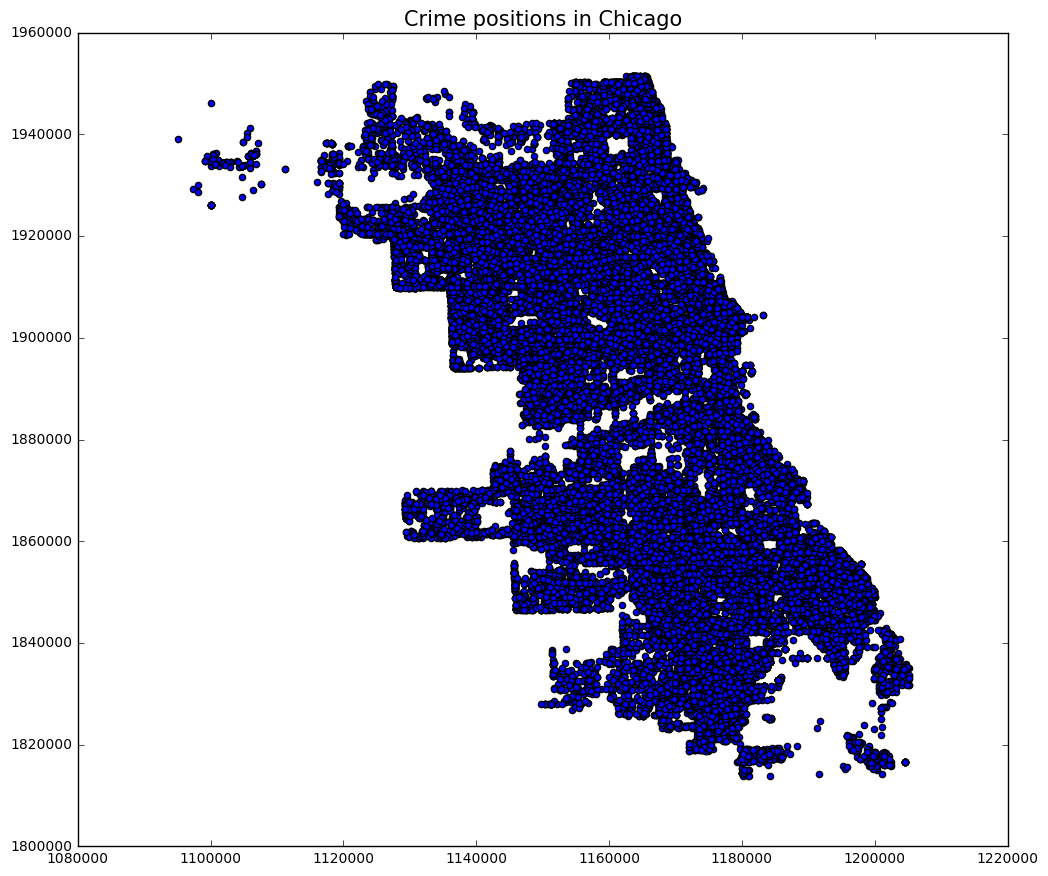

In [4]:
plt.rcParams['figure.figsize'] = (12.0, 10.5)

cordX = data['X Coordinate'].as_matrix()
cordX = cordX[~np.isnan(cordX)]
cordY = data['Y Coordinate'].as_matrix()
cordY = cordY[~np.isnan(cordY)]
cordX = [a for a in cordX if (a >= 1000)]
cordY = [a for a in cordY if (a >= 1000)]

plt.title("Crime positions in Chicago", fontsize = 15)
plt.scatter(cordX, cordY)

[10 10  6 ...,  8  3 11]


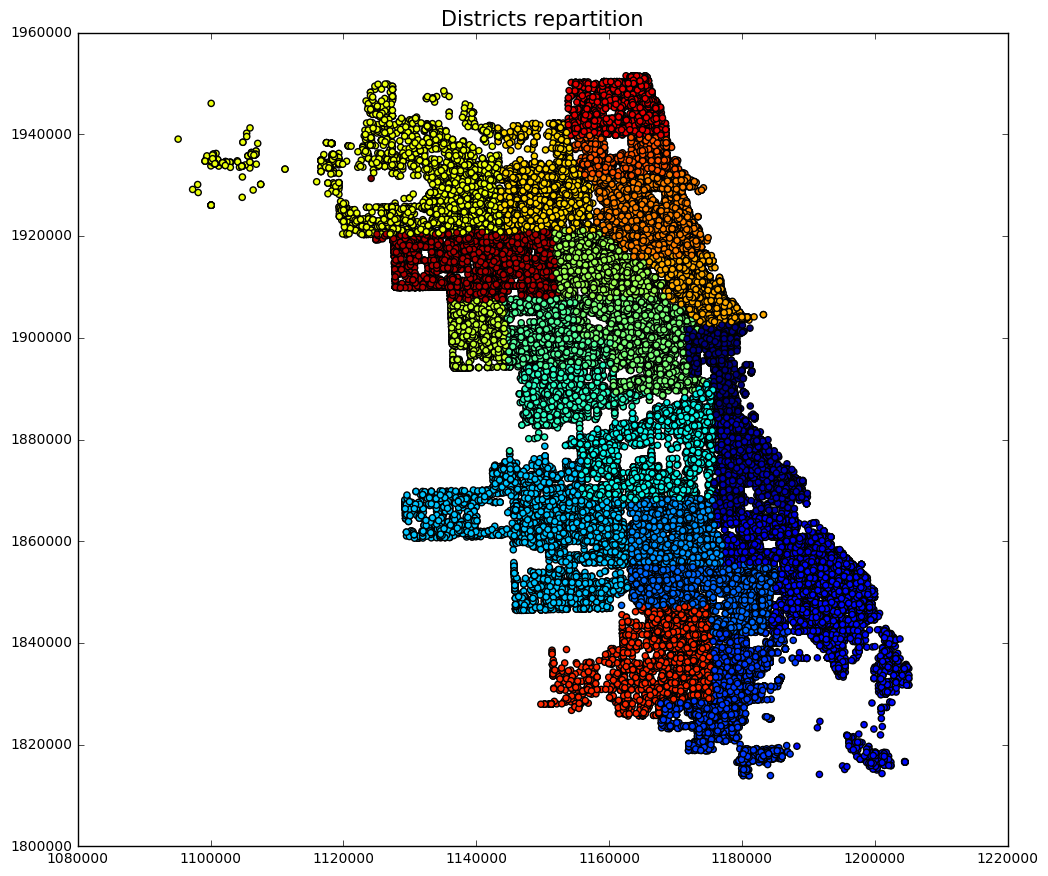

In [5]:
from sklearn import preprocessing
import matplotlib.patches as mpatches

cordX = data['X Coordinate'].as_matrix()
cordY = data['Y Coordinate'].as_matrix()

labels = preprocessing.LabelEncoder()
district = data['District'].as_matrix()
labels.fit(district)
districts_labeled = labels.transform(district) 
print(districts_labeled)
mask = np.isnan(data['X Coordinate'].as_matrix())
cordX = cordX[~mask]
cordY = cordY[~mask]
districts_labeled = districts_labeled[~mask]

""" dirty way to eliminate nonsense points """
mask2 = []
for i in range(len(cordX)): 
    if cordX[i] < 1000 or cordY[i] < 1000:
        mask2.append(i)
        
cordX = np.delete(cordX, mask2)
cordY = np.delete(cordY, mask2)
districts_labeled = np.delete(districts_labeled, mask2)

plt.title("Districts repartition", fontsize = 15)
plt.scatter(cordX, cordY, c=districts_labeled)

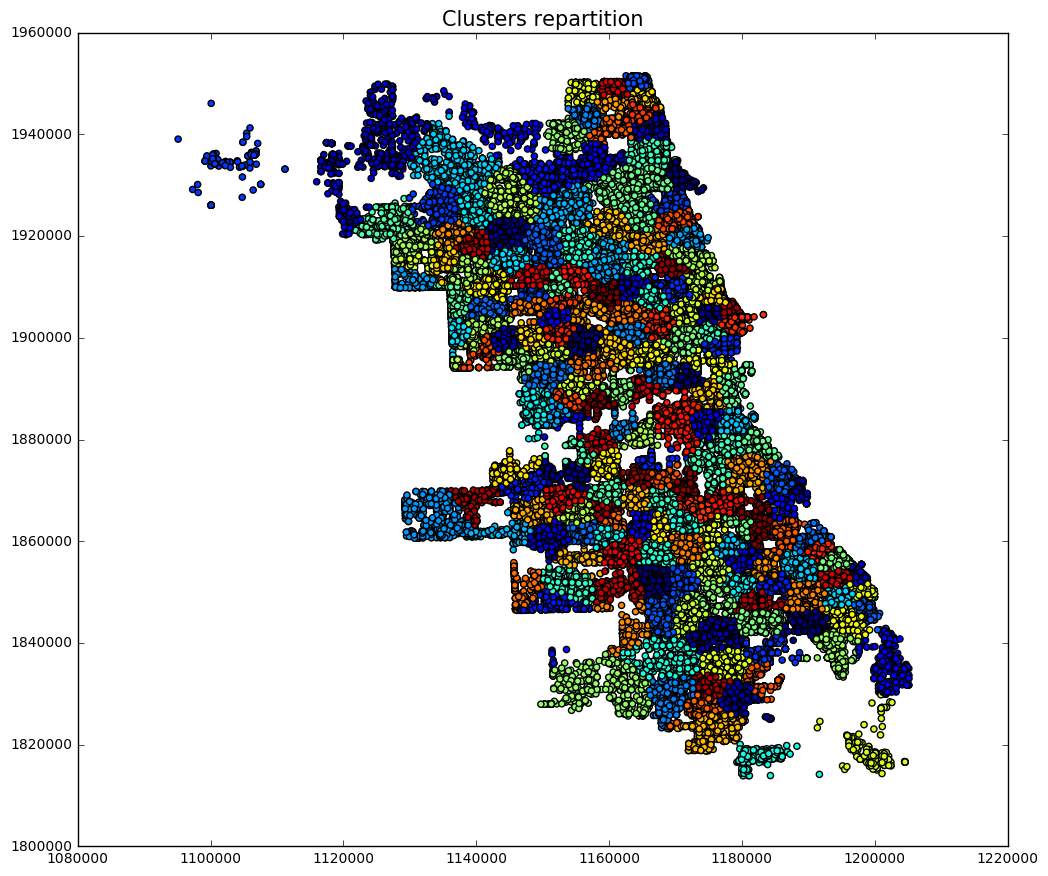

In [8]:
from sklearn import preprocessing
import matplotlib.patches as mpatches
from sklearn.cluster import *

data = data.dropna()

coordX = data['X Coordinate']
coordY = data['Y Coordinate']
coordXY = pd.concat([coordX, coordY],axis=1).as_matrix()

modelCluster = MiniBatchKMeans(n_clusters=200, init='k-means++', max_iter=100, batch_size=100, verbose=0, compute_labels=True,
                                 random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)

listClusters = modelCluster.fit_predict(coordXY)

coordX = coordX.as_matrix()
coordY = coordY.as_matrix()

""" dirty way to eliminate nonsense points """
mask2 = []
for i in range(len(coordX)):
    if coordX[i] < 1000 or coordY[i] < 1000:
        mask2.append(i)
        
coordX = np.delete(coordX, mask2)
coordY = np.delete(coordY, mask2)
listClusters = np.delete(listClusters, mask2)

plt.title("Clusters repartition", fontsize = 15)
plt.scatter(coordX, coordY, c=listClusters)